# COMP-551 : Applied Machine Learning
# Assignment 1
<br>
Name: Steve Lee
<br>
McGill ID: 260568977

---

# Q1 - Sampling
## 1) Write a pseudocode from the given multinomial distribution
<br>
Given multinomial distribution, p, we can define the range of the intervals of the categories as the following:


| Categories             | Movies | COMP-551 | Playing | Studying |
|------------------------|--------|----------|---------|----------|
| Probabilities          | 0.2    | 0.4      | 0.1     | 0.3      |
| Limits of the subInterval | 0.2    | 0.6      | 0.7     | 1.0      |


For example, Category "COMP-551" ranges from 0.2 to  0.6


Then the sampling of the activity from the distribution can be written as below


```python
# Pseudocode: Sampling activity from p
activity = ""
s = Random number in range [0,1]
if s < 0.2 then 
    activity is "Movie"
else if s >= 0.2 and s < 0.6 then 
    activity is "COMP-551"
else if s >= 0.6 and s < 0.7 then 
    activity is "Playing"
else if s >= 0.7 then 
    activity is "Studying"
end 
```


## 2)  Implement the algorithm

In [1]:
import random

def sample(n):
  '''
  input : number of days, n
  output : count of each activity 
  
  Everytime an activity is sampled, the corresponding variable will be incremented.
  ex) if s = 0.1234567 then it will increment the variable "movie" 
  '''
  movies, comp551, playing, studying = 0,0,0,0
  for i in range(0, n):
    # generate random number from 0 to 1
    s = random.random()
    if s < 0.2:
      movies += 1
    elif s >= 0.2 and s < 0.6:
      comp551 += 1
    elif s >= 0.6 and s < 0.7:
      playing += 1
    elif s >= 0.7:
      studying += 1
  
  return [movies, comp551, playing, studying]


def report(categories, result):
  '''
  print results from function "sample"
  '''
  n = sum(result)
  print("Reporting fraction of activities that are sampled for {} days: ".format(n))
  for c, r in zip(categories, result):
    print("{} : {}%".format(c, 100*r/n))


    
categories = ("Movies", "COMP-551", "Playing", "Studying" )


In [2]:
# 100 days
report(categories, sample(100))


Reporting fraction of activities that are sampled for 100 days: 
Movies : 24.0%
COMP-551 : 42.0%
Playing : 8.0%
Studying : 26.0%


In [3]:
# 1000 days
report(categories, sample(1000))


Reporting fraction of activities that are sampled for 1000 days: 
Movies : 18.8%
COMP-551 : 43.9%
Playing : 9.4%
Studying : 27.9%


In conclusion, we can observe that the fraction for the activities are getting closer to the defined multinomial distribution as the value of the "day" increased (i.e. more data). 



---
# Q2 - Model Selection
## 1) Fitting without regularization

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Generate N x P matrix X from input x 
def genX(x, degree):
    X = np.ones((len(x), degree+1))
    for i in range(len(x)):
        for j in range(degree + 1):
            X[i][j] = x[i]**j
    return X

# w* = (X^TX)^-1 * X^TY
def genWeights(X,y):
    w_temp = np.dot(X.T, X)
    w_temp = np.linalg.inv(w_temp)
    w_temp = np.dot(w_temp, X.T)
    w = np.dot(w_temp, y)
    return w

# given a input x and weights, predict ouput y
def predict_y(weights, x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(weights)):
            y[i] += (weights[j] * (x[i]**j))
    return y

# calculate MSE
def MSE(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()
    

In [6]:
# My data directory
data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')

# prepare data
csv_train = os.path.join(data_dir, 'Dataset_1_train.csv')
csv_valid = os.path.join(data_dir, 'Dataset_1_valid.csv')
csv_test = os.path.join(data_dir, 'Dataset_1_test.csv')

train = np.genfromtxt(csv_train, delimiter=',', dtype=np.float)[:,:2]
valid = np.genfromtxt(csv_valid, delimiter=',', dtype=np.float)[:,:2]
test = np.genfromtxt(csv_test, delimiter=',', dtype=np.float)[:,:2]

train_x = train[:,0]
train_y = train[:,1]
valid_x = valid[:,0]
valid_y = valid[:,1]
test_x = test[:,0]
test_y = test[:,1]

Result:

	Training MSE : 6.4747040050552735
	Validation MSE : 1417.8987342087942
	Test MSE : 50.65363364426098


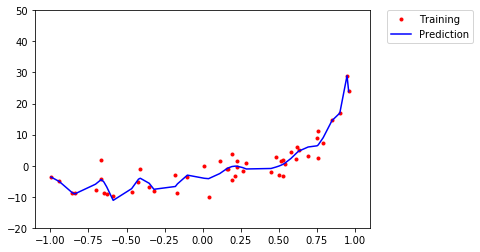

In [7]:
# 20-degree polynomial
DEGREE = 20

train_X = genX(train_x, DEGREE)  

w = genWeights(train_X, train_y)

train_yp = predict_y(w, train_x)
valid_yp = predict_y(w, valid_x)
test_yp = predict_y(w, test_x)

print("Result:\n")
print("\tTraining MSE : {}".format(MSE(train_yp, train_y)))
print("\tValidation MSE : {}".format(MSE(valid_yp, valid_y)))
print("\tTest MSE : {}".format(MSE(test_yp, test_y)))

plt.plot(train_x, train_y, 'r.', label = "Training")
new_x, new_y = zip(*sorted(zip(train_x, train_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

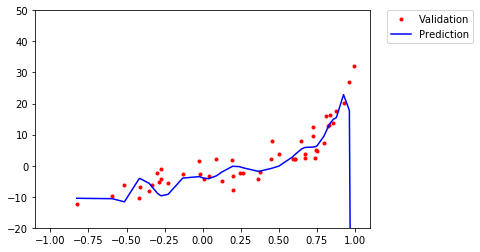

In [8]:
plt.plot(valid_x, valid_y, 'r.', label = "Validation")
new_x, new_y = zip(*sorted(zip(valid_x, valid_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

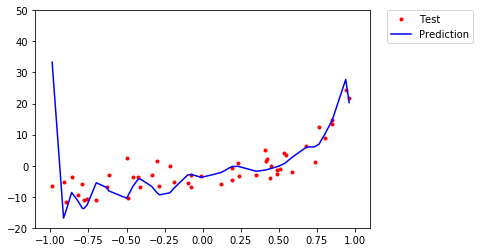

In [9]:
plt.plot(test_x, test_y, 'r.', label = "Test")
new_x, new_y = zip(*sorted(zip(test_x, test_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

In conclusion, the calculated MSE for Training set and Validation set is ~6.5 and ~1417.9.
Moreover, we can observe that our prediction model shows excellent fit for training set, but not for the validation set.
<br>
The prediction shows poor representation of the function and it indicates that the model is overfitting (Low MSE for training set, but high MSE for validation). More accurate prediction can be achieved by adding more data points or adding a penalty term to the error function to control coefficients (i.e. discouraging them from reaching large values)
<br>


## 2) L2 Regularization method


In [10]:
# w* = (X^TX + λI)^-1 * X^TY
def genL2Weights(X, y, lamda, degree):
    w_temp = np.dot(X.T, X) + lamda * np.identity(degree+1)
    w_temp = np.linalg.inv(w_temp)
    w = np.dot(np.dot(w_temp, X.T), y)
    return w


# generate all MSE values for lamda between 0 to 1
def L2Regularization(train_x, train_y, valid_x, valid_y, degree=20, step=0.0001):
    # initially set MSE as a big number and find optimal lamda 
    train_MSE = []
    valid_MSE = []
    lamdas = []
    weights = []
    temp_lamda = step
    X = genX(train_x, degree)
    while temp_lamda < 1:
        w = genL2Weights(X, train_y, temp_lamda, degree)
        new_train_y = predict_y(w, train_x)
        new_valid_y = predict_y(w, valid_x)
        train_MSE.append(MSE(new_train_y, train_y))
        valid_MSE.append(MSE(new_valid_y, valid_y))
        lamdas.append(temp_lamda)
        weights.append(w)
        temp_lamda += step
    return lamdas, train_MSE, valid_MSE, weights

# get results
lamdas, train_MSE, valid_MSE, weights = L2Regularization(train_x, train_y, valid_x, valid_y)


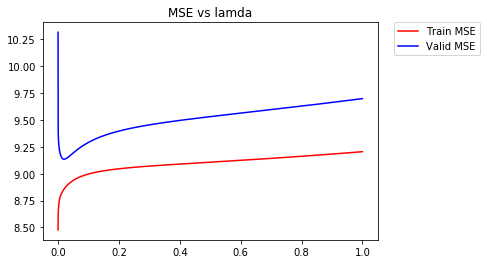

The best lamda is 0.019699999999999936, which has the minimum MSE, 9.135083473007539, for the valid set


In [11]:
# plot the graph for MSE
plt.plot(lamdas, train_MSE, 'r', label = "Train MSE")
plt.plot(lamdas, valid_MSE, 'b', label = "Valid MSE")
plt.title("MSE vs lamda")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# get best lamda
idx = np.argmin(valid_MSE)
minMSE = valid_MSE[idx]
bestLamda = lamdas[idx]
bestW = weights[idx]


print('The best lamda is {}, which has the minimum MSE, {}, for the valid set'.format(bestLamda, minMSE))


Result:

	Training MSE : 8.856456800480217
	Validation MSE : 9.135083473007539
	Test MSE : 10.732301005331


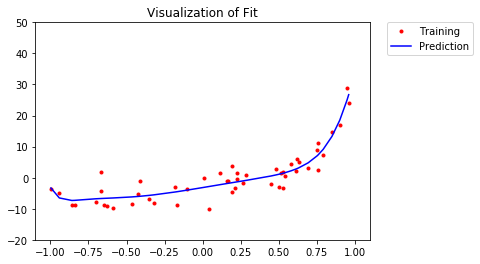

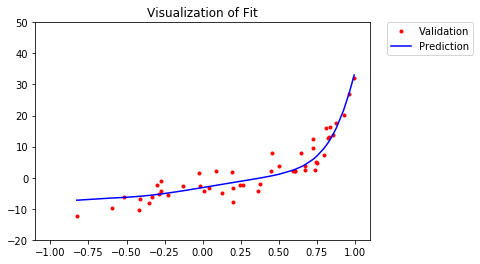

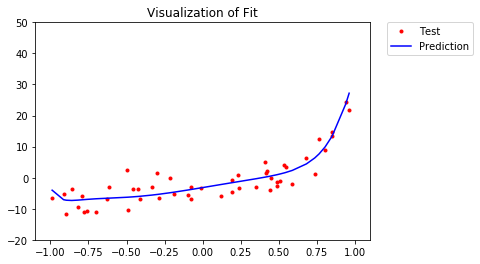

In [12]:
# plot the fit for training, validation, and test set
train_yp = predict_y(bestW, train_x)
valid_yp = predict_y(bestW, valid_x)
test_yp = predict_y(bestW, test_x)

print("Result:\n")
print("\tTraining MSE : {}".format(MSE(train_yp, train_y)))
print("\tValidation MSE : {}".format(MSE(valid_yp, valid_y)))
print("\tTest MSE : {}".format(MSE(test_yp, test_y)))

plt.plot(train_x, train_y, 'r.', label = "Training")
new_x, new_y = zip(*sorted(zip(train_x, train_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

plt.plot(valid_x, valid_y, 'r.', label = "Validation")
new_x, new_y = zip(*sorted(zip(valid_x, valid_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

plt.plot(test_x, test_y, 'r.', label = "Test")
new_x, new_y = zip(*sorted(zip(test_x, test_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

Adding L2 regulation improved the fit greatly compared to the method without regulation. In addition, the model has been tested with the separate test set to see the true performance. With current data, it seems the chosen lamda and the weights are good model where the fit is neither overfitting nor under fitting. However, it would require more data to conclude the model is truly good or not.

## 3) What do you think is the degree of the source polynomial? 

By observation, the shape of the fit looks like an exponential graph or a polynomial with even degrees. 

---

# Q3 - Gradient Descent for Regression
## 1) Fit a linear regression model to this dataset by using stochastic gradient descent

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# My data directory
data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')

# prepare data
csv_train = os.path.join(data_dir, 'Dataset_2_train.csv')
csv_valid = os.path.join(data_dir, 'Dataset_2_valid.csv')
csv_test = os.path.join(data_dir, 'Dataset_2_test.csv')

# raw data
train_data = np.genfromtxt(csv_train, delimiter=',', dtype=np.float)[:,:2]
valid_data = np.genfromtxt(csv_valid, delimiter=',', dtype=np.float)[:,:2]
test_data = np.genfromtxt(csv_test, delimiter=',', dtype=np.float)[:,:2]

# seperate inputs and outputs x,y
train_x = train_data[:,0]
train_y = train_data[:,1]
valid_x = valid_data[:,0]
valid_y = valid_data[:,1]
test_x = test_data[:,0]
test_y = test_data[:,1]

# step size for learning rate
alpha = 1e-6

# calculate MSE
def MSE(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()

# compute y, given coefficients w0 and w1
def predict_single_y(x, w):
    return w[0] + w[1]*x

# compute series of y, given an array of x
def predict_y(x, w):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = predict_single_y(x[i], w)
    return y
    
# stochastic gradient descent
def SGD(x, y, w, alpha):
    w[0] = w[0] - (alpha * ((predict_single_y(x, w)) - y))
    w[1] = w[1] - (alpha * ((predict_single_y(x, w)) - y) * x)
    return w

# compute MSE with given epoch and step size
def online_learning(train_x, train_y, valid_x, valid_y, test_x, test_y, epochs=1, alpha=1e-6):
    # start with some random coefficients, wo and w1
    w = np.random.rand(2)
    trainMSE = []
    validMSE = []
    testMSE = []
    for i in range(0, epochs):
        # for every epoch, shuffle the order of data points to prevent poor learning
        #shuffled_x = np.random.permutation(train_x)
        #shuffled_y = np.random.permutation(train_y)
        for j in range(0, train_x.shape[0]):
            w = SGD(train_x[j], train_y[j], w, alpha)
        validMSE.append(MSE(predict_single_y(valid_x, w), valid_y))
        trainMSE.append(MSE(predict_single_y(train_x, w), train_y))
        testMSE.append(MSE(predict_single_y(test_x, w), test_y))
    return w, trainMSE, validMSE, testMSE


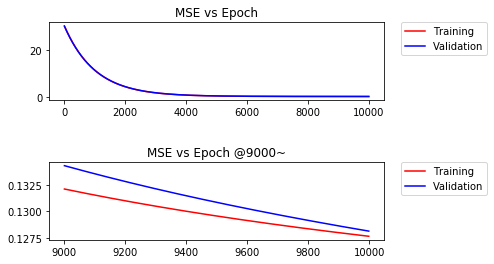

At epoch 10000 with step size = 1e-6:
	w0 = 3.90531794303802, w1 = 3.8901811576993057
	Train set MSE = [0.12764713274905526]
	Valid set MSE = [0.1281358767073476]


In [15]:
# get results
w, trainMSE, validMSE, testMSE = online_learning(train_x, train_y, valid_x, valid_y, test_x, test_y, epochs=10000)

# display results
epochs = [i for i in range(10000)]

plt.subplot(2, 1, 1)
plt.plot(epochs, trainMSE, 'r-', label = 'Training')
plt.plot(epochs, validMSE, 'b-', label = 'Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("MSE vs Epoch")

plt.subplots_adjust(hspace=0.8)

plt.subplot(2, 1, 2)
plt.plot(epochs[9000:], trainMSE[9000:], 'r-', label = 'Training')
plt.plot(epochs[9000:], validMSE[9000:], 'b-', label = 'Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("MSE vs Epoch @9000~")

plt.show()

print("At epoch 10000 with step size = 1e-6:")
print("\tw0 = {}, w1 = {}".format(w[0], w[1]))
print("\tTrain set MSE = {}".format(trainMSE[-1:]))
print("\tValid set MSE = {}".format(validMSE[-1:]))


## 2) Try different step sizes and choose the best step size by using validation data.

In [16]:
# find best step size
def best_learning(train_x, train_y, valid_x, valid_y, alphas, epochs=10000):
    # start with some random coefficients, wo and w1
    trainMSE = []
    validMSE = []
    testMSE = []
    coeff = []
    # try different step sizes 
    for alpha in alphas:
        w = np.random.rand(2)
        w_previous = np.copy(w)
        for i in range(0, epochs):
            for j in range(0, train_x.shape[0]):
                w = SGD(train_x[j], train_y[j], w, alpha)
            # if change is small enough, stop (assuming coefficents converged)
            if np.sqrt(np.mean((w-w_previous)**2)) < 1e-5:
                break;
            w_previous = np.copy(w)
        # store the result for each step size 
        validMSE.append(MSE(predict_single_y(valid_x, w), valid_y))
        trainMSE.append(MSE(predict_single_y(train_x, w), train_y))
    return trainMSE, validMSE, alphas


In [17]:
# find general trend about the step size
# if Step size is too large -> diverge; too small -> slow convergence
my_alphas = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,5e-2,1e-1]

trainMSE, validMSE, alphas = best_learning(train_x, train_y, valid_x, valid_y, alphas=my_alphas)

Minimum MSE 0.07385902262150221 at step size 0.01


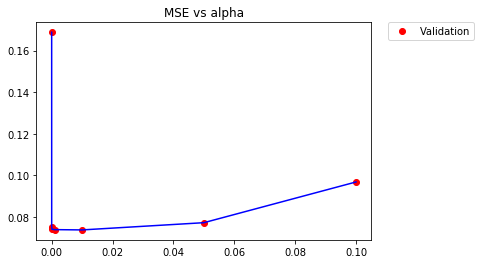

MSEs:
[31.969360726185084, 35.80204574204697, 12.745353195921625, 0.16880990363676393, 0.07547318177415645, 0.0741777881548875, 0.07399795345740919, 0.07385902262150221, 0.0773315666138334, 0.0968925259000041]


In [18]:
idx = np.argmin(validMSE)
minMSE = validMSE[idx]
bestAlpha = alphas[idx]

print("Minimum MSE {} at step size {}".format(minMSE, bestAlpha))

plt.plot(alphas[3:], validMSE[3:], 'ro', label = 'Validation')
plt.plot(alphas[3:], validMSE[3:], 'b-')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("MSE vs alpha")
plt.show()

print("MSEs:")
print(validMSE)

From the graph, MSE value decreases until the step size is 1e-6 and increases later on. Thus, it can be assumed that best step size could be found somewhere in between 1e-2 ~ 5e-2


In [19]:
import time

# try 100 different alphas in range found above
my_alphas = np.linspace(1e-2, 5e-5, 100, endpoint=False)

# time this computation
start = time.time()

trainMSE, validMSE, alphas = best_learning(train_x, train_y, valid_x, valid_y, my_alphas, epochs=7500)

print ("Total compute time : {} s".format(time.time() - start))

Total compute time : 9.123998880386353 s


In [20]:
# print best step size
idx = np.argmin(validMSE)
minMSE = validMSE[idx]
bestAlpha = alphas[idx]
tMSE = testMSE[idx]
print("Minimum MSE {} at step size {}".format(minMSE, bestAlpha))
print("Test MSE is {}".format(tMSE))

Minimum MSE 0.07382389713738338 at step size 0.0063184999999999995
Test MSE is 28.67012504176837


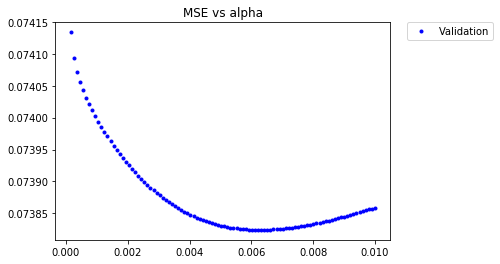

In [21]:
plt.plot(alphas, validMSE, 'b.', label = 'Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("MSE vs alpha")
plt.show()

In [22]:
w, trainMSE, validMSE, testMSE = online_learning(train_x, train_y, valid_x, valid_y, test_x, test_y, epochs=10000, alpha=bestAlpha)

print("Best Model is...\n\ty = {} + {}x".format(w[0], w[1]))
print("with step size {}".format(bestAlpha))

Best Model is...
	y = 3.586140430749109 + 4.324983373779598x
with step size 0.0063184999999999995


### 3) Visualize the fit for every epoch and report 5 visualizations

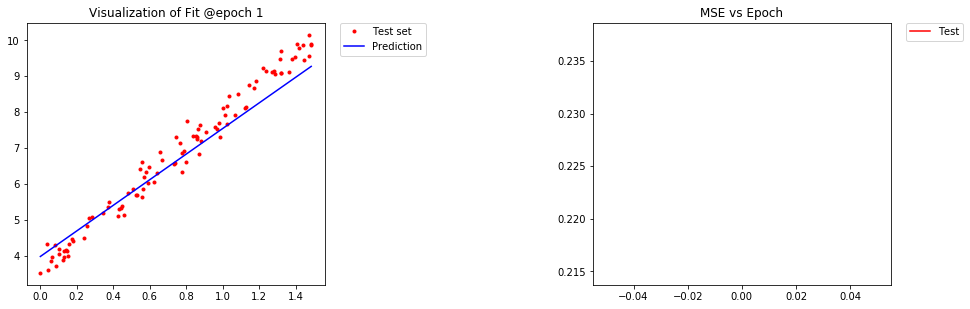

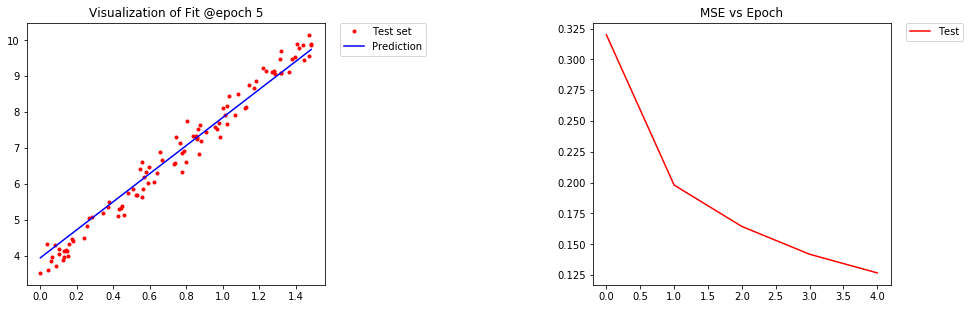

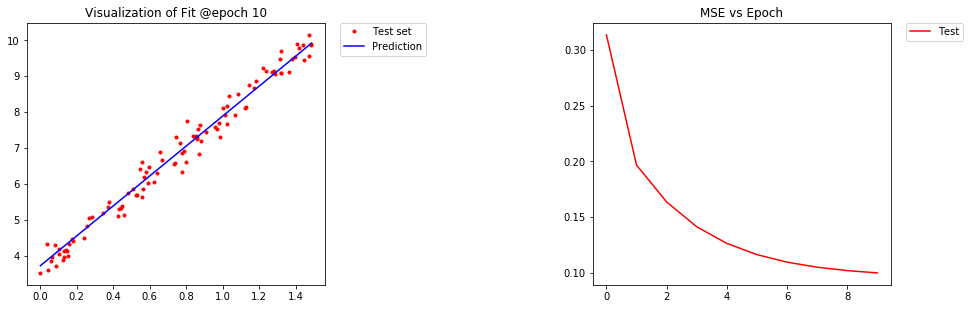

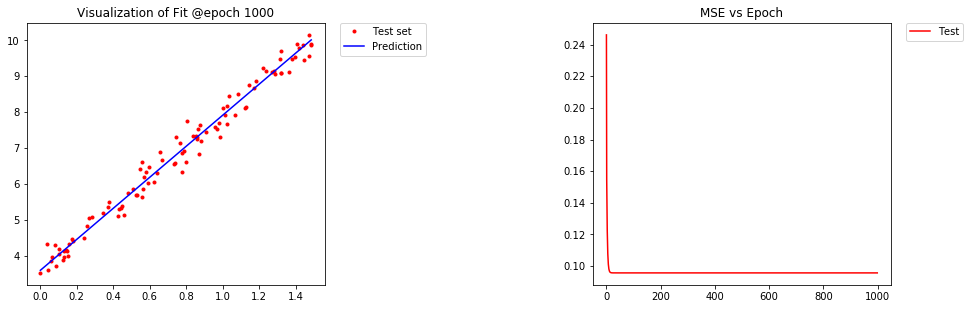

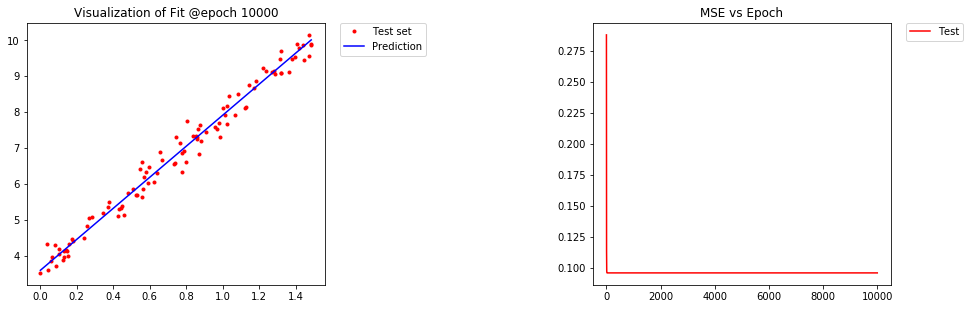

In [23]:
# choose 5 epoch values to see how it's evolving 
epochs = [1,5,10,1000,10000]

for epoch in epochs:
    w, trainMSE, validMSE, testMSE = online_learning(train_x, train_y, valid_x, valid_y, test_x, test_y, epochs=epoch, alpha=bestAlpha)
    
    test_yp = predict_y(test_x, w)
    plt.subplot(2, 2, 1)
    plt.plot(test_x, test_y, 'r.', label = "Test set")
    new_x, new_y = zip(*sorted(zip(test_x, test_yp)))
    plt.plot(new_x, new_y, 'b-', label="Prediction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Visualization of Fit @epoch {}".format(epoch))
    
    x_axis = [i for i in range(len(trainMSE))]
    plt.subplots_adjust(left=10, bottom=10, right=12, top=12, wspace=0.9, hspace=0.2)
    plt.subplot(2, 2, 2)
    plt.plot(x_axis, trainMSE, 'r-', label = 'Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("MSE vs Epoch")
    
    plt.show()
    

As the epoch increased, the fit improve. However, after 1000 epoch, there was not much change in the fit, which indicates that the weights w0 and w1 have converged. This behavior can be observed from the graphs in 2nd column.

---

# Q4 - Real life dataset
## 1) Complete the dataset (http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime).
### a) Using sample mean to fill out missing values


In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# My data directory
data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')

# prepare data
community_data = os.path.join(data_dir, 'communities.data')

# raw data
df = pd.read_csv(community_data, na_values=['?'], header=None)

print("Raw data")
df.head(10)


Raw data


0     1        2                    3    4     5     6     7     8     9    \
0    8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   
5    6   NaN      NaN    SouthPasadenacity    1  0.02  0.28  0.06  0.54  1.00   
6   44   7.0  41500.0          Lincolntown    1  0.01  0.39  0.00  0.98  0.06   
7    6   NaN      NaN            Selmacity    1  0.01  0.74  0.03  0.46  0.20   
8   21   NaN      NaN        Hendersoncity    1  0.03  0.34  0.20  0.84  0.02   
9   29   NaN      NaN          Claytoncity    1  0.01  0.40  0.06  0.87  0.30   

   ...    118   119   120   121   122  123  124   125   126   127  
0  ...   0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...   0.02  0.12  0.45   NaN   NaN  NaN  NaN  0.00   NaN  0.67  
2  ...   0.01  0.21  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.43  
3  ...   0.02  0.39  0.28   NaN   NaN  NaN  NaN  0.00   NaN  0.12  
4  ...   0.04  0.09  0.02   NaN   NaN  NaN  NaN  0.00   NaN  0.03  
5  ...   0.01  0.58  0.10   NaN   NaN  NaN  NaN  0.00   NaN  0.14  
6  ...   0.05  0.08  0.06   NaN   NaN  NaN  NaN  0.00   NaN  0.03  
7  ...   0.01  0.33  0.00   NaN   NaN  NaN  NaN  0.00   NaN  0.55  
8  ...   0.04  0.17  0.04   NaN   NaN  NaN  NaN  0.00   NaN  0.53  
9  ...   0.00  0.47  0.11   NaN   NaN  NaN  NaN  0.00   NaN  0.15  

[10 rows x 128 columns]

In [25]:
# fill in the blanks with mean 
i = 0
new_df = df.copy()
for col in new_df:
    # fill in the blank with mean value if NaN exists
    if new_df[col].isnull().any():
        new_df[col] = new_df[col].fillna(value=new_df[col].mean())
        i += 1
        
print("{} columns with missing values".format(i))
print("New dataset missing values filled with mean:")
new_df.head(10)

25 columns with missing values
New dataset missing values filled with mean:


0          1             2                    3    4     5     6     7    \
0    8  58.826829  46188.336597         Lakewoodcity    1  0.19  0.33  0.02   
1   53  58.826829  46188.336597          Tukwilacity    1  0.00  0.16  0.12   
2   24  58.826829  46188.336597         Aberdeentown    1  0.00  0.42  0.49   
3   34   5.000000  81440.000000  Willingborotownship    1  0.04  0.77  1.00   
4   42  95.000000   6096.000000    Bethlehemtownship    1  0.01  0.55  0.02   
5    6  58.826829  46188.336597    SouthPasadenacity    1  0.02  0.28  0.06   
6   44   7.000000  41500.000000          Lincolntown    1  0.01  0.39  0.00   
7    6  58.826829  46188.336597            Selmacity    1  0.01  0.74  0.03   
8   21  58.826829  46188.336597        Hendersoncity    1  0.03  0.34  0.20   
9   29  58.826829  46188.336597          Claytoncity    1  0.01  0.40  0.06   

    8     9    ...    118   119   120       121       122       123       124  \
0  0.90  0.12  ...   0.12  0.26  0.20  0.060000  0.040000  0.900000  0.500000   
1  0.74  0.45  ...   0.02  0.12  0.45  0.163103  0.076708  0.698589  0.440439   
2  0.56  0.17  ...   0.01  0.21  0.02  0.163103  0.076708  0.698589  0.440439   
3  0.08  0.12  ...   0.02  0.39  0.28  0.163103  0.076708  0.698589  0.440439   
4  0.95  0.09  ...   0.04  0.09  0.02  0.163103  0.076708  0.698589  0.440439   
5  0.54  1.00  ...   0.01  0.58  0.10  0.163103  0.076708  0.698589  0.440439   
6  0.98  0.06  ...   0.05  0.08  0.06  0.163103  0.076708  0.698589  0.440439   
7  0.46  0.20  ...   0.01  0.33  0.00  0.163103  0.076708  0.698589  0.440439   
8  0.84  0.02  ...   0.04  0.17  0.04  0.163103  0.076708  0.698589  0.440439   
9  0.87  0.30  ...   0.00  0.47  0.11  0.163103  0.076708  0.698589  0.440439   

    125       126   127  
0  0.32  0.140000  0.20  
1  0.00  0.195078  0.67  
2  0.00  0.195078  0.43  
3  0.00  0.195078  0.12  
4  0.00  0.195078  0.03  
5  0.00  0.195078  0.14  
6  0.00  0.195078  0.03  
7  0.00  0.195078  0.55  
8  0.00  0.195078  0.53  
9  0.00  0.195078  0.15  

[10 rows x 128 columns]

<br>
Filling out missing values in the dataset can be tricky. There are many techniques to approach this problem and using "sample mean" is one of them. This approach is not a bad choice when the number of missing value is significantly small compared to the total number of data. 

However, in this dataset, there are total 1994 data points and 1675 missing values for certain attributes like PolicReqPerOffic, LemasSworn and etc. This is approximately 84% and it is hard to suggest that filling mean values is ok.


### b) alternative choices for missing values
For alternative choices we have:

1. Replace missing values with median/mode
2. Delete rows or columns with missing values
3. Predict the missing value using methods like linear regression
4. Use other algorithms(e.g. KNN) that supports missing values 

### c) Compare methods
First of all, the data has to be cleaned up by eliminating non-predictive attributes described in the Data Set Description.
Thus, first 5 columns(state, county, community, communityname, and fold) will not be used for training. 
Moreover, we can observe that there are 25 attributes that has missing values. 24 attributes have high ratio of missing data(~84%) and 1 attribute (i.e. OtherPerCap) with 1 missing value. Attributes that have large ratio of missing data will be removed rather than filling it with mean to avoid false prediction, and for attribute "OtherPerCap" will be filled with mean. 


### d) Make complete 80-20 split dataset

In [26]:
import re

# indicate where the directory is 
data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')
data_attributes = os.path.join(data_dir, 'communities.names')

# get attributes
with open(data_attributes, 'r') as description:
    attr_data = description.readlines()

attributes = []
for line in attr_data:
    if line.startswith("@attribute"):
        attributes.append(re.search(r'^@attribute\s+(.*?)(\s+numeric|\s+string)', line).group(1))
    elif line.startswith("@data"):
        break;


# clean up the data 
new_df = df.copy()
new_df.columns = attributes

# drop first 5 non-predictive attributes
np_attr = ['state', 'county', 'community', 'communityname', 'fold']
new_df.drop(np_attr, inplace=True, axis=1)

i = 0

# clean up rest of the data
for col in new_df:
    # if too many '?' in the column, drop 
    if (new_df[col].count() / len(new_df[col])) < 0.5:
        new_df.pop(col)
        i += 1
    # fill in the blank with mean value if NaN exists
    else:
        if new_df[col].isnull().any():
            new_df[col] = new_df[col].fillna((new_df[col].mean()))


print("{} columns dropped".format(i+5))
print("New dataset missing values filled with mean:")
new_df.head()



27 columns dropped
New dataset missing values filled with mean:


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
0         ...                     0.12              0.42            0.50   
1         ...                     0.21              0.50            0.34   
2         ...                     0.14              0.49            0.54   
3         ...                     0.19              0.30            0.73   
4         ...                     0.11              0.72            0.64   

   PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  \
0           0.51            0.64      0.12     0.26            0.20   
1           0.60            0.52      0.02     0.12            0.45   
2           0.67            0.56      0.01     0.21            0.02   
3           0.64            0.65      0.02     0.39            0.28   
4           0.61            0.53      0.04     0.09            0.02   

   LemasPctOfficDrugUn  ViolentCrimesPerPop  
0                 0.32                 0.20  
1                 0.00                 0.67  
2                 0.00                 0.43  
3                 0.00                 0.12  
4                 0.00                 0.03  

[5 rows x 101 columns]

In [27]:
# split the dataset for training and test set
def split_data(df, train_ratio=0.8, n=5):
    # My data directory
    data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')
    # make n test, train set
    
    train_len = int(len(df) * train_ratio)
    test_len = len(df) - train_len
    # make boolean mask
    tnf = np.append(np.ones((1, train_len), dtype=bool),  np.zeros((1, test_len), dtype=bool))
    for i in range(0, n): 
        mask = np.random.permutation(tnf)
        #mask = np.random.rand(len(df)) < train_ratio
        train_set = df[mask]
        test_set = df[~mask]
        
        train_name = os.path.join(data_dir, "CandC-train{}.csv".format(i+1))
        test_name = os.path.join(data_dir, "CandC-test{}.csv".format(i+1))
        train_set.to_csv(train_name, index=False)
        test_set.to_csv(test_name, index=False)
 
'''
running this function will create new csv files in Datasets folder and alter the result
'''
split_data(new_df) 


## 2) Fit the above data using linear regression


In [48]:
def load_data(n, folder_name='Datasets'):
    data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), folder_name)
    train_name = os.path.join(data_dir, "CandC-train{}.csv".format(n))
    test_name = os.path.join(data_dir, "CandC-test{}.csv".format(n))
    
    train_set = pd.read_csv(train_name, header=[0])
    test_set = pd.read_csv(test_name, header=[0])
    
    # seperate input/output
    train_y = train_set['ViolentCrimesPerPop']
    train_set.pop('ViolentCrimesPerPop')
    train_x = train_set.copy()
    
    test_y = test_set['ViolentCrimesPerPop']
    test_set.pop('ViolentCrimesPerPop')
    test_x = test_set.copy()

    train_y = np.array(train_y)
    train_x = np.array(train_x)
    test_y = np.array(test_y)
    test_x = np.array(test_x)

    return train_y, train_x, test_y, test_x


# w* = (X^TX)^-1 * X^TY
def genWeights(X,y):
    w_temp = np.dot(X.T, X)
    w_temp = np.linalg.inv(w_temp)
    w_temp = np.dot(w_temp, X.T)
    w = np.dot(w_temp, y)
    return w

# given a input x and weights, predict ouput y
def predict_y(weights, x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(weights)):
            y[i] += (weights[j] * x[i][j])
    return y

# calculate MSE
def MSE(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()

    
# calculate MSE and w with given set
def n_fold_cross_validation(train_x, train_y, test_y, test_x):
    train_MSE = []
    test_MSE = []
    weights = []
    for i in range(len(train_x)):
        w = genWeights(train_x[i], train_y[i])
        new_train_y = predict_y(w, train_x[i])
        new_test_y = predict_y(w, test_x[i])
        train_MSE.append(MSE(new_train_y, train_y[i]))
        test_MSE.append(MSE(new_test_y, test_y[i]))
        weights.append(w)
    return train_MSE, test_MSE, weights

# load data in to below arrays
train_y, train_x, test_y, test_x = [], [], [], []

for n in range(1, 6):
    a,b,c,d = load_data(n)
    train_y.append(a)
    train_x.append(b)
    test_y.append(c)
    test_x.append(d)


train_MSE, test_MSE, weights = n_fold_cross_validation(train_x, train_y, test_y, test_x)


Result from CandC_train/test1.csv :
	MSE: 0.017956454132902627
	Parameters:
[ 0.15727541  0.05617066  0.20834221 -0.01932094  0.03837509  0.07945314
  0.12711059 -0.09369799 -0.21915092  0.17415198 -0.29249046  0.051967
 -0.18378309 -0.16446161  0.05750164 -0.10282215  0.09137072 -0.01801297
 -0.0580699   0.31672049 -0.02062842 -0.30409523 -0.02129082 -0.03559464
  0.02850432  0.05817738  0.04631524  0.21103606 -0.12410772 -0.12711192
  0.09489902  0.06666029  0.04031556  0.35024827 -0.05018703  0.00996885
  0.0779707   0.11381205  0.56324501  0.18115453  0.24036027 -0.68944956
 -0.13505732 -0.13450099 -0.21894439  0.01465566  0.05756915  0.05918515
 -0.2092732  -0.17387555  0.17461435 -0.2102445  -0.03392449  0.11263133
 -0.10669774  0.07485021  0.03761623 -0.39568626  0.81460991 -0.48360559
  0.03980533 -0.09180424 -0.00670139 -0.22353825  0.64331397 -0.05412545
 -0.24560326 -0.55490092  0.23882991  0.16450712  0.04814129  0.10931991
 -0.0689694   0.46608955  0.04832991 -0.07399119 -

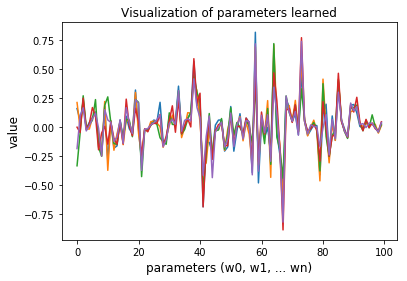

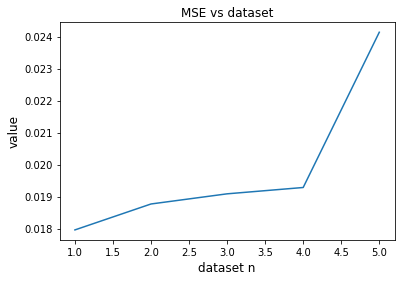

Mean of the MSEs : 0.019844753328713903
	Best MSE found at CandC_train/test1.csv : 0.017956454132902627


In [49]:
# show results
for n in range(len(weights)):
    print("Result from CandC_train/test{}.csv :".format(n+1))
    print("\tMSE: {}".format(test_MSE[n]))
    print("\tParameters:")
    print(weights[n])
    x_axis = [i for i in range(len(weights[n]))]
    plt.plot(x_axis, weights[n])
plt.title("Visualization of parameters learned")
plt.xlabel('parameters (w0, w1, ... wn)', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.show()

plt.plot([1,2,3,4,5], test_MSE)
plt.title("MSE vs dataset")
plt.xlabel('dataset n', fontsize=12)
plt.ylabel('value', fontsize=12)
plt.show()

idx = np.argmin(test_MSE)
minMSE = test_MSE[idx]
mean_MSE = np.mean(test_MSE)
print("Mean of the MSEs : {}".format(mean_MSE))
print("\tBest MSE found at CandC_train/test{}.csv : {}".format(idx+1, minMSE))


### 3) Use Ridge-regression

In [50]:
# w* = (X^TX + λI)^-1 * X^TY
def genL2Weights(X, y, lamda):
    w_temp = np.dot(X.T, X)
    w_temp = w_temp + lamda * np.identity(w_temp.shape[1])
    w_temp = np.linalg.inv(w_temp)
    w = np.dot(np.dot(w_temp, X.T), y)
    return w


# n fold cross validation with lamda
def n_fold_cross_validation(train_x, train_y, test_y, test_x, lamda):
    train_MSE = []
    test_MSE = []
    weights = []
    for i in range(len(train_x)):
        w = genL2Weights(train_x[i], train_y[i], lamda)
        new_train_y = predict_y(w, train_x[i])
        new_test_y = predict_y(w, test_x[i])
        train_MSE.append(MSE(new_train_y, train_y[i]))
        test_MSE.append(MSE(new_test_y, test_y[i]))
        weights.append(w)
    avg_train_MSE = np.mean(train_MSE)
    avg_test_MSE = np.mean(test_MSE)
    idx = np.argmin(test_MSE)
    bestWeight = weights[idx]
    return avg_train_MSE, avg_test_MSE, bestWeight

# generate all MSE values for lamda between 0 to 1
def ridge_regression(train_x, train_y, test_y, test_x, lamdas):
    train_MSE = []
    test_MSE = []
    weights = []
    for lamda in lamdas:
        avg_train_MSE, avg_test_MSE, w = n_fold_cross_validation(train_x, train_y, test_y, test_x, lamda)
        train_MSE.append(avg_train_MSE)
        test_MSE.append(avg_test_MSE)
        weights.append(w)
    return train_MSE, test_MSE, weights, lamdas

lamdas = np.linspace(0.0, 2.0, 200, endpoint=False)
train_MSE, test_MSE, weights, lamdas = ridge_regression(train_x, train_y, test_y, test_x, lamdas)

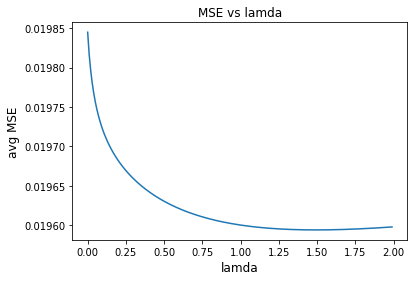

Minimum Average MSE 0.019593849068351425 @lamda = 1.49


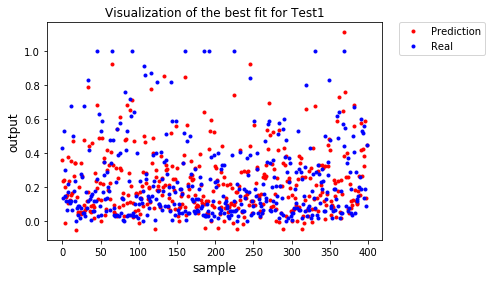

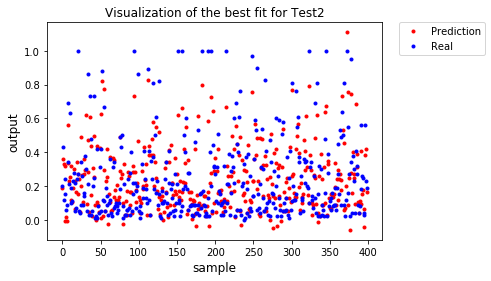

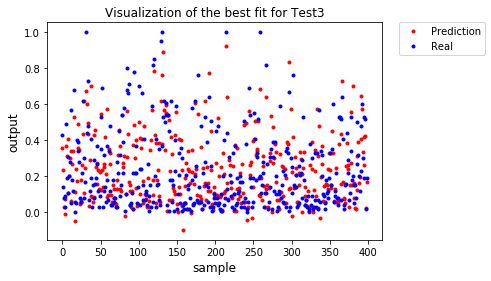

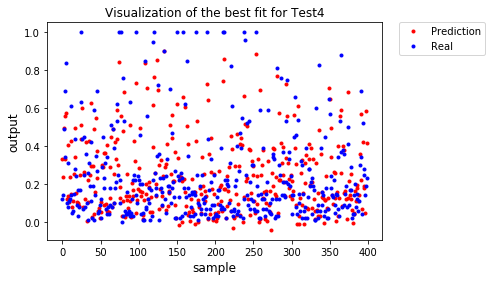

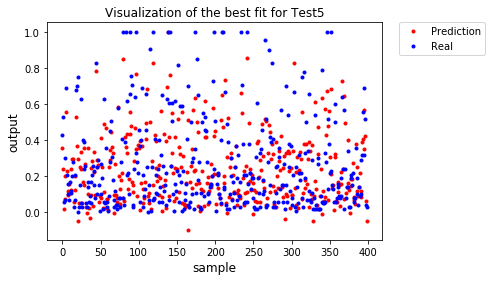

In [51]:
plt.plot(lamdas, test_MSE)
plt.title("MSE vs lamda")
plt.xlabel('lamda', fontsize=12)
plt.ylabel('avg MSE', fontsize=12)
plt.show()

idx = np.argmin(test_MSE)
minMSE = test_MSE[idx]
lamda = lamdas[idx]
bestW = weights[idx]
print("Minimum Average MSE {} @lamda = {}".format(minMSE, lamda))

i = 1
for x,y in zip(test_x, test_y):
    predicted_y = predict_y(bestW, x)
    plt.plot(predicted_y, 'r.', label="Prediction")
    plt.plot(y, 'b.', label="Real")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Visualization of the best fit for Test{}".format(i))
    plt.xlabel('sample', fontsize=12)
    plt.ylabel('output', fontsize=12)
    plt.show()
    i+=1


### a) Best lamda?

From the result above, the minimum MSE was achieved when the value of lamda was equal to 0.149 
<br>

### b) Is it possible to use the information above to select features?
Since the features are linear to the model,
<br>
$y = w_{0} * x_{0} + w_{1} * x_{1} + w_{2} * x_{2} + ... + w_{n} * x_{n}$ (n features)
<br>
the parameters that are small are going to have less impact on y, compare to the larger parameters.
Thus, by dropping the smallest absolute parameters, we can choose the most effective parameters.
<br>
Each time, the smallest feature will be dropped, and the MSE will be calculated. If the MSE is in acceptable range (i.e. equal or below the average MSE found at part a), then that feature will be removed. The procedure will be repeated until the MSE reaches the average MSE.

### c) Show the best fit of reduced lamda



In [55]:
# generate index of the smallest to largest absolute value of w 
def sort_idx(w):
    return np.argsort(np.absolute(w))

# delete column from an array
def del_column(arr, idx, axis):
    return np.delete(arr, idx, axis)
    
# reduce feature
def reduce_feature(train_x, train_y, test_x, test_y, avg_MSE, w, sorted_idx):
    test_MSE = []
    new_MSE=[]
    current_MSE = avg_MSE
    idx = []
    n = 0
    # repeat until MSE is in acceptable range
    while current_MSE <= avg_MSE:
        train_MSE, test_MSE = [], []
        idx.append(sorted_idx[n])
        print(idx)
        for i in range(len(train_x)):
            # delete the smallest feature
            temp_xtrain = del_column(train_x[i], idx, 1)
            temp_xtest = del_column(test_x[i], idx, 1)
            temp_w = del_column(w, idx, 0)
            
            # compute MSE
            new_train_y = predict_y(temp_w, temp_xtrain)
            new_test_y = predict_y(temp_w, temp_xtest)
            train_MSE.append(MSE(new_train_y, train_y[i]))
            test_MSE.append(MSE(new_test_y, test_y[i]))
        current_MSE = np.mean(test_MSE)
        new_MSE.append(current_MSE)
        n+=1
    return idx, new_MSE, test_MSE


# my weights and index
w = weights[idx]
w_idx = sort_idx(w)

# load data in to below arrays
train_y, train_x, test_y, test_x = [], [], [], []

for n in range(1, 6):
    a,b,c,d = load_data(n)
    train_y.append(a)
    train_x.append(b)
    test_y.append(c)
    test_x.append(d)

print("Collecting indexes that can be discarded...")
to_discard, new_MSE, test_MSE = reduce_feature(train_x, train_y, test_x, test_y, minMSE, w, w_idx)
print("Total {} features can be removed".format(len(to_discard)))

[32]
[32, 84]
[32, 84, 59]
[32, 84, 59, 55]
[32, 84, 59, 55, 92]
[32, 84, 59, 55, 92, 95]
[32, 84, 59, 55, 92, 95, 54]
[32, 84, 59, 55, 92, 95, 54, 87]
[32, 84, 59, 55, 92, 95, 54, 87, 97]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78, 45]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78, 45, 80]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78, 45, 80, 66]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78, 45, 80, 66, 57]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76, 22, 78, 45, 80, 66, 57, 47]
[32, 84, 59, 55, 92, 95, 54, 87, 97, 41, 93, 56, 17, 76

selected_feature :
[-0.03965192  0.06946701  0.16719828 -0.03992655  0.05855486 -0.09657793
  0.10618899 -0.05076705  0.04387085  0.0349087  -0.06240669  0.03961942
 -0.06863687  0.08146634 -0.04242189  0.04039858 -0.05291793 -0.11110103
  0.05592911  0.03788425  0.03861064 -0.07700315 -0.07794263  0.05434297
  0.05595239  0.17197511 -0.03549392  0.0619565   0.03691638  0.17078324
  0.07814317 -0.05637428  0.0450106  -0.09616367 -0.13359539  0.03454279
 -0.13340146 -0.03349715  0.19846454 -0.10704959  0.07567543  0.04861995
 -0.05537701 -0.07403599 -0.07297672  0.14302956 -0.06351279  0.14361041
  0.1264599   0.11269958 -0.08214443  0.05664609 -0.06030637 -0.10241467
  0.05977018 -0.16334058  0.0474873   0.1514194   0.06524321 -0.0866358
  0.1340177   0.16607532  0.04421745  0.05099183 -0.03491728  0.03319403]
MSEs for 5 different datasets
[0.018373306807713274, 0.01868341891694443, 0.01802453638945185, 0.019036947542270997, 0.025705323279892917]


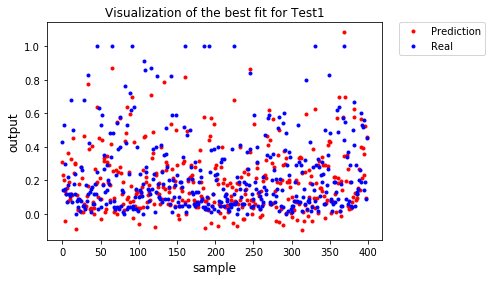

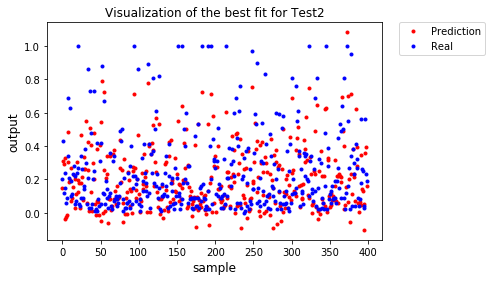

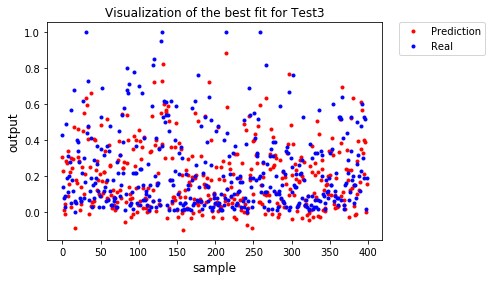

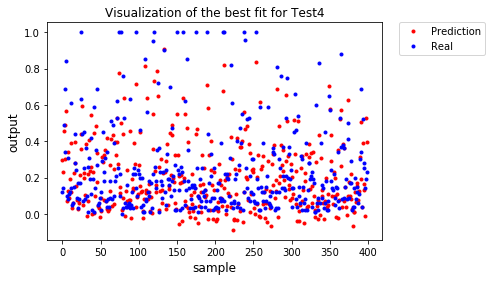

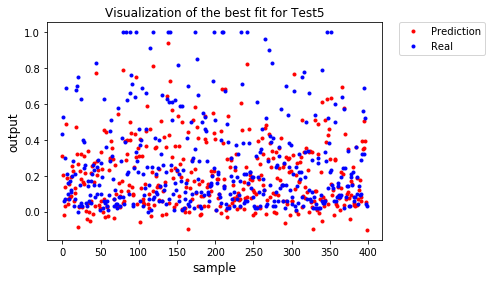

Final MSE after selecting features : [0.019326688217631095]


In [56]:
selected_feature = del_column(w, to_discard, 0)
print("selected_feature :")
print(selected_feature)
print("MSEs for 5 different datasets")
print(test_MSE)

i=1
for x,y in zip(test_x, test_y):
    predicted_y = predict_y(selected_feature, del_column(x, to_discard, 1))
    plt.plot(predicted_y, 'r.', label="Prediction")
    plt.plot(y, 'b.', label="Real")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Visualization of the best fit for Test{}".format(i))
    plt.xlabel('sample', fontsize=12)
    plt.ylabel('output', fontsize=12)
    plt.show()
    i+=1
print("Final MSE after selecting features : {}".format(new_MSE[-2:-1]))

### d) Old Model vs New model

Compared to the previous model, the amount of features significantly decreased (101 -> 67 features). Because the amount of parameters that have to be computed, has decreased, the total computing time has decreased as well. Moreover, the new model's accuracy in terms of MSE, is as good as the old model. 


In [58]:
import pandas as pd

# return names of the features that are associated with w
def get_feature_name(n, col_drop,folder_name='Datasets'):
    data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), folder_name)
    train_name = os.path.join(data_dir, "CandC-train{}.csv".format(n))
    
    df = pd.read_csv(train_name, header=[0])
    
    # seperate input/output
    train_y = df['ViolentCrimesPerPop']
    df.pop('ViolentCrimesPerPop')
    df.drop(df.columns[col_drop],axis=1,inplace=True)


    return df.columns

features = get_feature_name(1, to_discard)

print(features)

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctHisp', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'OtherPerCap',
       'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctRecImmig8', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
       'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart',
       'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'MedR